In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import new_mlfuncs
import funcs
import mlfuncs
import dlfuncs
from tensorflow.keras import layers
from keras.layers import Dense
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import tensorflow_addons as tfa

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
# import train data
train_filepath = 'data/df_merged.csv'
train_df, train_df_nulls = funcs.read_and_qa(train_filepath)

There are 41 columns and 59400 records in the dataframe.
Extracting count and percentages of nulls and non nulls


In [4]:
# import test data
test_filepath = 'data/test_values.csv'
test_df, test_df_nulls = funcs.read_and_qa(test_filepath)

There are 40 columns and 14850 records in the dataframe.
Extracting count and percentages of nulls and non nulls


In [5]:
# initial columns to drop
initial_to_drop = ['id', 'date_recorded', 'num_private', 'region', 'permit', 'installer', 'wpt_name', 'subvillage', 'lga', 'ward',\
                  'management_group', 'payment']
target_var = 'status_group'
num_cols = []
feats_to_exclude = []

In [6]:
train_red_df = new_mlfuncs.pre_ml_preprocessing(train_df, initial_to_drop, num_cols, target_var = 'status_group', missing_val_threshold = 40, num_cols_threshold = 0.9, low_var_threshold = 0.9)

Dropping: id
Dropping: date_recorded
Dropping: num_private
Dropping: region
Dropping: permit
Dropping: installer
Dropping: wpt_name
Dropping: subvillage
Dropping: lga
Dropping: ward
Dropping: management_group
Dropping: payment
Dropping scheme_name due to missing values count above threshold: 0.4
There are no high correlated features. No column will be dropped!
Dropping low variance feature: public_meeting
Dropping low variance feature: recorded_by


In [7]:
test_red_df = new_mlfuncs.pre_ml_preprocessing(test_df, initial_to_drop, num_cols, target_var = None, missing_val_threshold = 40, num_cols_threshold = 0.9, low_var_threshold = 0.9)

Dropping: id
Dropping: date_recorded
Dropping: num_private
Dropping: region
Dropping: permit
Dropping: installer
Dropping: wpt_name
Dropping: subvillage
Dropping: lga
Dropping: ward
Dropping: management_group
Dropping: payment
Dropping scheme_name due to missing values count above threshold: 0.4
There are no high correlated features. No column will be dropped!
Dropping low variance feature: public_meeting
Dropping low variance feature: recorded_by


In [8]:
train, test, le = new_mlfuncs.target_encode_categorical_features(train_red_df, test_red_df, target=target_var, alpha=10)

In [9]:
SEED = 42

In [10]:
metrics = 'accuracy'
target_var = 'target_encoded'

In [11]:
history, result, y_test, y_preds, model, pipe = dlfuncs.train_model(train, 'adam', 'sparse_categorical_crossentropy', target_var, feats_to_exclude, metrics=metrics)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              26624     
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                        

In [13]:
result

[0.5832753777503967, 0.771709144115448]

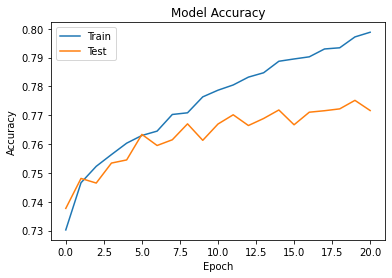

In [14]:
dlfuncs.plot_history(history)